- title: Probability Plot
- slug: probability-plot
- summary: Understand how probability plots can be utilized to compare your dataset to a perfect distribution
- date: 2018-12-02 8:12  
- category: Math
- subcategory: Distributions
- posttype: Article
- keywords: probability plot python
- tags: normal distribution, standard deviation, probability plot, python, pandas
- authors: Dan Friedman

A P-P, or probability plot, is a type of visualization to help us visually and subjectively assess if a set of data is similar to a theoretical distribution such as normal or exponential. We can also see what data points may violate or be outside the compared distribution. 

### Import Modules

In [128]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import warnings
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

I turn warnings off in this post because of an <a href='https://stackoverflow.com/a/52817582'>issue in Scipy</a> that will be fixed in a later version.

In [129]:
warnings.filterwarnings('ignore')

Visualization styling code

In [130]:
sns.set(rc={'figure.figsize':(12.5, 9.5)})
sns.set_context('talk')

### Generate Data

Using the `numpy` package's `random` module, we can call the `normal()` method to create a list of values with a fairly normal distribution by setting the following arguments:

- `loc` as the mean of the distribution
- `scale` as the standard deviation of the distribution
- `size` as number of samples

I set a mean of `0`, a standard deviation of `10` and create `1200` data points.

In [131]:
np.random.seed(4) # seed random number generator with fixed value so we always get same values below
normal_distr_values = list(np.random.normal(loc=0, scale=10, size=1200))

### Plot Histogram of `normal_distr_values`

Below is a plot of a histogram of these values that resemble a normal distribution.

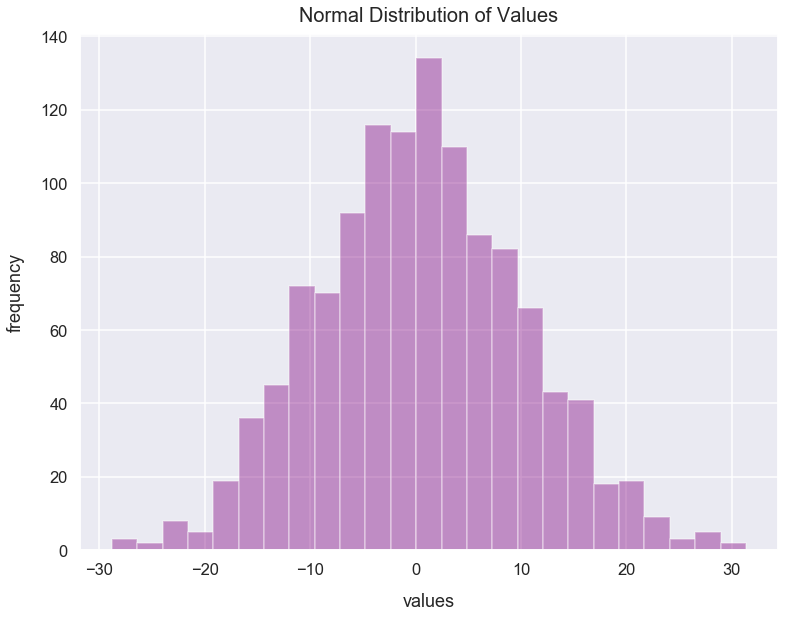

In [132]:
sns.distplot(normal_distr_values, kde=False, color='purple')
plt.title("Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("frequency", labelpad=15);

### What are Quantiles (aka Percentiles)

**Percentiles** are the value below which a percentage of data falls. Since we have a near-normal distribution, we know that roughly:

- 68% of values are within plus or minus 1 standard deviation from the mean
- 95% of values are within plus or minus 2 standard deviations from the mean
- 99.7% of values are within plus or minus 3 standard deviations from the mean

We can visualize the first list item below.

In [133]:
plus_one_std_dev = np.mean(normal_distr_values) + np.std(normal_distr_values)
minus_one_std_dev = np.mean(normal_distr_values) - np.std(normal_distr_values)

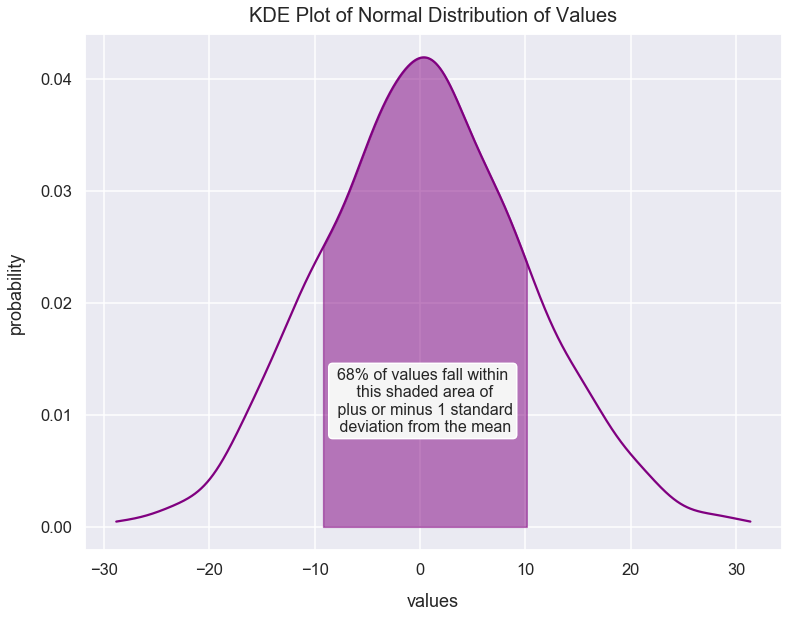

In [134]:
kde = stats.gaussian_kde(normal_distr_values)
pos = np.linspace(min(normal_distr_values), max(normal_distr_values), 50000)
plt.plot(pos, kde(pos), color='purple')
shade = np.linspace(minus_one_std_dev, plus_one_std_dev, 300)
plt.fill_between(shade, kde(shade), alpha=0.5, color='purple',)
plt.text(x=0.25, y=.0085, horizontalalignment='center', fontsize=16, 
         s="68% of values fall within\n this shaded area of\n plus or minus 1 standard\n deviation from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.25"))
plt.title("KDE Plot of Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("probability", labelpad=15);

We can also calculate simple summary statistics of the median and standard deviation of `normal_distr_values`.

In [135]:
std_dev = round(np.std(normal_distr_values), 1)
median = round(np.median(normal_distr_values), 1)
print("normal_distr_values has a median of {0} and a standard deviation of {1}".format(median, std_dev))

normal_distr_values has a median of 0.5 and a standard deviation of 9.7


Let's calculate the exact values from `normal_distr_values` for -3, -2, -1, 1, 2, and 3 standard deviations from the mean. 

In [136]:
for number_deviations in [-3, -2, -1, 1, 2, 3]:
    value = round(np.mean(normal_distr_values) + number_deviations * np.std(normal_distr_values), 1)
    print("{0} is {1} standard deviations from the mean".format(value, number_deviations))

-28.5 is -3 standard deviations from the mean
-18.9 is -2 standard deviations from the mean
-9.2 is -1 standard deviations from the mean
10.1 is 1 standard deviations from the mean
19.8 is 2 standard deviations from the mean
29.4 is 3 standard deviations from the mean


### Verify our Distribution is Fairly Normal with a Probability Plot

In the visualization below, our set of values, `normal_distr_values` is plotted against a perfectly normal distribution. Below the plot I'll explain this visualization in detail.

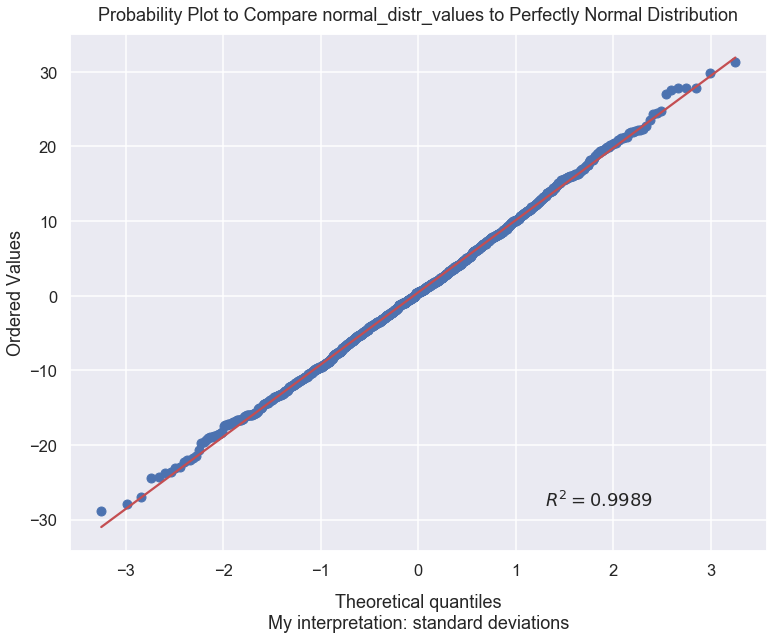

In [137]:
stats.probplot(normal_distr_values, dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

The blue dots are the values from `normal_distr_values`. Here's a table that compares the standard deviations values we calculated above to coordinates of the blue dots in the plot below.

standard deviations from mean | `normal_distr_values` value | ~approx.~ coordinate of (theoretical quantile, ordered value) blue dot
--- | --- | ---
-3 | -28.5 | (-3, -29)
-2 | -18.9 | (-2, -19)
-1 | -9.2 | (-1, -9)
1 | 10.1 | (1, 10)
2 | 19.8 | (2, 20)
3 | 29.4 | (3, 30)

I hope this helps make sense of how the blue dots were calculated.

So what is the red line? Well, that's our perfect normal distribution that takes our median of `normal_distr_values`, 0.5, and its standard deviation of 9.7, and plots that as a perfect normal distribution. Let's add the approximate red-line ordered values for each standard deviation to our table from above.

standard deviations from mean | `normal_distr_values` value | ~approx.~ coordinate (theoretical quantile, ordered value) of blue dot | ~approx.~ coordinate (theoretical quantile, ordered value) on red line
--- | --- | --- | ---
-3 | -28.5 | (-3, -29) | (-3, -28.6)
-2 | -18.9 | (-2, -19) | (-2, -18.9)
-1 | -9.2 | (-1, -9) | (-1, -9.2)
1 | 10.1 | (1, 10) | (1, 10.2)
2 | 19.8 | (2, 20) | (2, 19.9)
3 | 29.4 | (3, 30) | (3, 29.6)

Closely compare the coordinates from the third and fourth columns of the table above! They're pretty close! Why aren't they perfect? In the beginning of this article, we used the `numpy` package's `random` module and called the `normal()` method to create a list of values with a fairly normal distribution. However, the distribution we created wasn't *perfectly* normal. The way we sampled data may have caused a little variance from a perfectly normal distribution. We can see that variance because if you look closely at the plot, there are some blue dots that don't perfectly overlap with the red line.

Though overall, from a visual standpoint, it looks like our `normal_distr_values` does resemble a fairly normal distribution.

You can also use the `propplot` method to verify a set of values compares to other perfect distributions like uniform and exponential. You can read more about the `probplot()` method from the official <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html'>Scipy documention page</a>.